## Brain Rhythms 

Sensorimotor Rhythms 
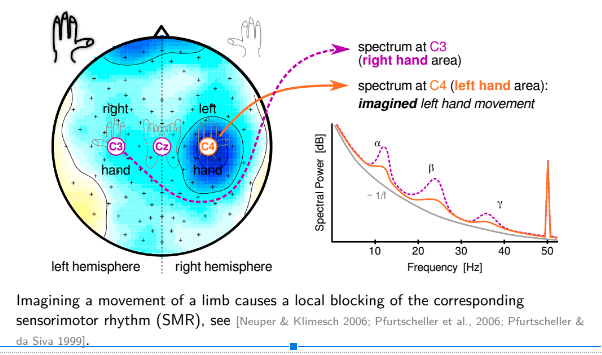
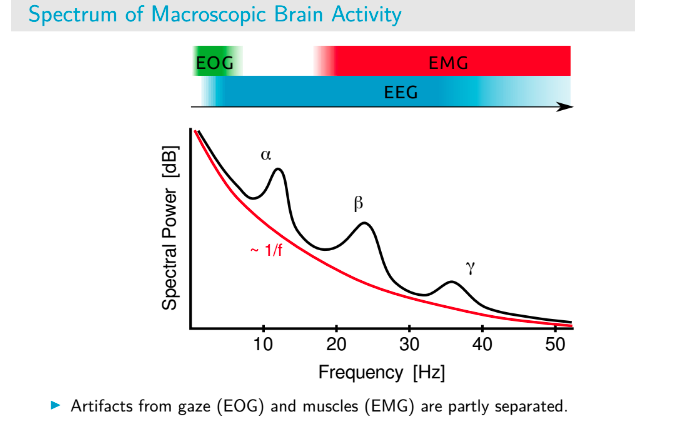

# Statistical analysis

## Results comparison

Both t-test and ANOVA (Analysis of Variance) are statistical tests commonly used in hypothesis testing to compare means of different groups. They help researchers determine whether there are significant differences between the group means and are widely used in various fields, including psychology, biology, social sciences, and more.

T-Test:
A t-test is used when comparing the means of two groups to determine if there is a significant difference between them. There are three main types of t-tests:

Independent Samples T-Test: This test is used when comparing the means of two independent groups (e.g., male vs. female, control group vs. experimental group). It assesses whether the means of the two groups are significantly different.

Paired Samples T-Test: This test is used when comparing the means of two related groups (e.g., before and after measurements on the same individuals). It assesses whether the means of the two related groups are significantly different.

One Sample T-Test: This test is used to compare the mean of a single group to a known or hypothesized value. It assesses whether the mean of the single group significantly differs from the known value.

The t-test calculates a t-value, which is then compared to a critical t-value from a t-distribution table or obtained using statistical software. If the t-value exceeds the critical value, it indicates a significant difference between the group means.

ANOVA (Analysis of Variance):
ANOVA, on the other hand, is used when comparing means of three or more groups. It determines whether there are any statistically significant differences between the means of the groups. ANOVA partitions the total variation in the data into two components: variation between groups (treatment effect) and variation within groups (random error). It then tests whether the variation between groups is larger than the variation within groups, suggesting that there are significant differences in means.

There are different types of ANOVA depending on the experimental design:

One-Way ANOVA: Used when comparing the means of three or more independent groups for a single factor or independent variable.

Two-Way ANOVA: Used when comparing the means of multiple groups based on two independent variables, which are typically categorical.

Repeated Measures ANOVA: Used when comparing means for related groups measured at different time points or under different conditions.

ANOVA produces an F-statistic, which is compared to a critical F-value from an F-distribution table or obtained through statistical software. If the F-value exceeds the critical value, it suggests a significant difference between the group means.

Both t-test and ANOVA help researchers make informed decisions about the significance of observed differences between group means and provide valuable insights in various scientific studies.

T-Test Results:
T-Statistic: -8.551459943248734
P-Value: 3.292961428703629e-15

ANOVA Results:
F-Statistic: 48.38326340789861
P-Value: 7.165227636770374e-17


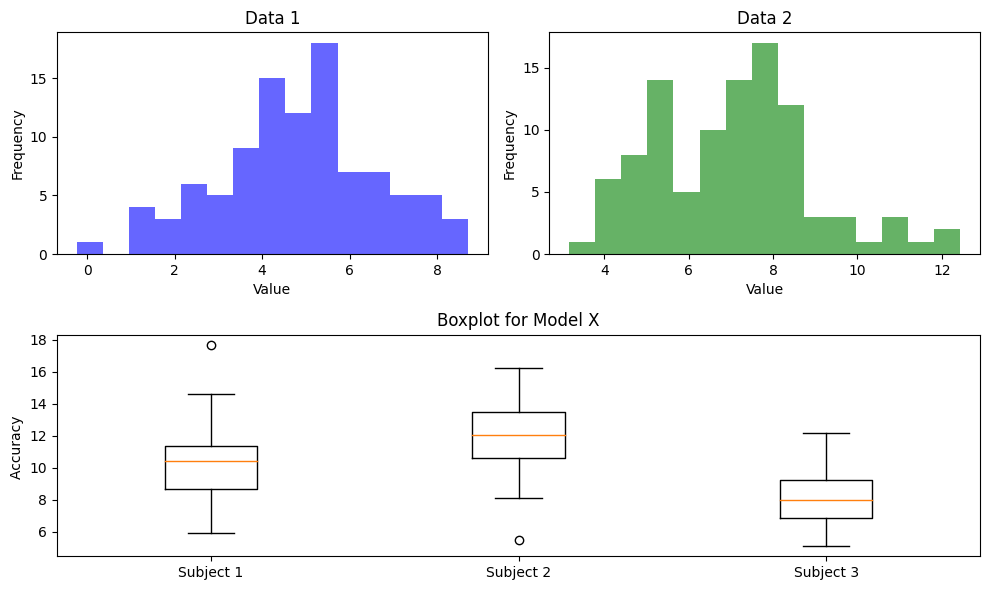

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate some sample data for demonstration purposes
np.random.seed(42)
data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=7, scale=2, size=100)

data_group1 = np.random.normal(loc=10, scale=2, size=50)
data_group2 = np.random.normal(loc=12, scale=2, size=50)
data_group3 = np.random.normal(loc=8, scale=2, size=50)

# Compute t-test
t_stat, p_value = stats.ttest_ind(data1, data2)

# Compute ANOVA
f_stat, p_value_anova = stats.f_oneway(data_group1, data_group2, data_group3)

# Print the results
print("T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
print("\nANOVA Results:")
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value_anova}")

# Data Visualization
plt.figure(figsize=(10, 6))

# Histogram for data1
plt.subplot(2, 2, 1)
plt.hist(data1, bins=15, color='blue', alpha=0.6)
plt.title('Data 1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for data2
plt.subplot(2, 2, 2)
plt.hist(data2, bins=15, color='green', alpha=0.6)
plt.title('Data 2')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Boxplot for ANOVA data
plt.subplot(2, 1, 2)
plt.boxplot([data_group1, data_group2, data_group3], labels=['Subject 1', 'Subject 2', 'Subject 3'])
plt.title('Boxplot for Model X')
plt.ylabel('Accuracy ')

plt.tight_layout()
plt.show()


In [1]:
import bbcpy

In [2]:
import numpy as np 
import math
import os 
import sys 
import random
import pandas as pd
from tqdm import tqdm
import copy

from bbcpy.datatypes.utils import *
from bbcpy.load.srm_eeg import *
module_path = os.path.abspath(os.path.join('../../bbcpy_AutoML/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils.visualization as vis
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [3]:
srm_metadata_path = "../data/SMR/metadata/"
subject_group_path = list_all_files(srm_metadata_path, pattern="*.json")

In [4]:
sorted_subject_group_path = vis.sort_subject_by_key(subject_group_path)

In [5]:
sorted_subject_group_path.keys()

dict_keys(['MBSRsubject', 'no_MBSRsubject'])

In [6]:
MBSRsubject_stat_dict = vis.get_trial_stats(sorted_subject_group_path["MBSRsubject"], key="subject_result")
no_MBSRsubject_stat_dict = vis.get_trial_stats(sorted_subject_group_path["no_MBSRsubject"], key="subject_result")

In [8]:
vis.plot_histogram_subject(MBSRsubject_stat_dict, subject_group="MBSRsubject", key="artifact")

Loading BokehJS ...

In [21]:
vis.plot_histogram_subject(no_MBSRsubject_stat_dict, subject_group="no_MBSRsubject", key="result")

Loading BokehJS ...

In [ ]:
vis.plot_histogram_subject(MBSRsubject_stat_dict, subject_group="MBSRsubject", key="artifact")

In [ ]:
vis.plot_histogram_subject(no_MBSRsubject_stat_dict, subject_group="no_MBSRsubject", key="artifact")

In [ ]:
vis.plot_scatter_subject(no_MBSRsubject_stat_dict, subject_group="no_MBSRsubject", key="targethitnumber")

In [ ]:
vis.plot_scatter_subject(MBSRsubject_stat_dict, subject_group="MBSRsubject", key="targethitnumber")

### Histogram

# Classification option 

* PDS Features : Power Spectral Density of 1Hz bins in the relevant frequency band (in dB scale)
* ERD/ERS Features : Band-pass filter of conti. data, calculate hull curves of trials 
* Log Band-Power Features : Band-pass filter conti. data, calculate logarithmized variance of trials 


### {"R": 0, "L": 1, "U": 2, "D": 3}

In [10]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt

from src.data.srm_datamodule import SRMDatamodule

In [15]:
srm_raw_path = "../data/SMR/raw/"
srm_data = SRMDatamodule(srm_raw_path,
                         bands=[8,13],
                         classes=["R", "L"],
                         chans=['C*', 'FC*'],
                         ival="2s:8s:10ms",
                         concatenate_subjects=True)

In [16]:
srm_data, timepoints, srm_fs, clab, mnt, trial_info, subject_info = srm_data.load_session_raw_data(session_path="../data/SMR/raw/S1_Session_1.mat")

In [17]:
srm_data.shape

(450,)

In [22]:
clab

array(['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ',
       'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2',
       'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4',
       'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6',
       'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7',
       'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2',
       'CB2'], dtype='<U3')

In [23]:
mnt

array([[-2.54250312e-02,  1.22149477e-01,  3.31239319e-02],
       [ 9.40120697e-03,  1.23970804e-01,  3.26123762e-02],
       [ 4.40888786e-02,  1.13829517e-01,  3.31036568e-02],
       [-3.37424517e-02,  1.16909304e-01,  5.79841328e-02],
       [ 5.44751120e-02,  1.05628691e-01,  5.81207418e-02],
       [-7.83825016e-02,  7.27006531e-02,  3.08105540e-02],
       [-7.25030994e-02,  8.30518150e-02,  5.49346304e-02],
       [-5.60919333e-02,  9.36399364e-02,  7.47453165e-02],
       [-2.66999745e-02,  1.00547199e-01,  8.88864803e-02],
       [ 7.81929433e-03,  1.01569357e-01,  9.32569408e-02],
       [ 4.34424829e-02,  9.33848286e-02,  9.03150463e-02],
       [ 6.96289587e-02,  7.91225576e-02,  7.55228376e-02],
       [ 8.30028439e-02,  6.79895639e-02,  5.79724979e-02],
       [ 8.75810432e-02,  5.33428526e-02,  3.47922325e-02],
       [-8.69426632e-02,  4.71490765e-02,  3.07961082e-02],
       [-8.45407295e-02,  5.83357716e-02,  6.09054995e-02],
       [-6.51338196e-02,  6.83564854e-02

In [20]:
trial_info.keys()

dict_keys(['tasknumber', 'runnumber', 'trialnumber', 'targetnumber', 'triallength', 'targethitnumber', 'resultind', 'result', 'forcedresult', 'artifact'])

In [21]:
trial_info["artifact"]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [3]:
import bbcpy
imagVPaw = bbcpy.load.eeg.data("../local/data/imagVPaw/imagVPaw.npz")

In [4]:
imagVPaw.fs

array(100, dtype=uint8)

In [ ]:
import bci_minitoolbox as bci
cnt, fs, clab, mnt, mrk_pos, mrk_class, mrk_className = bci.load_data("../local/data/imagVPaw/imagVPaw.npz")

In [5]:
def proc_spatialFilter(cnt, clab, chan, neighbors='*'):
    '''
    Usage:
        cnt_sf = proc_spatialFilter(cnt, clab, chan, neighbors='*')
    Parameters:
        cnt:       a 2D array of multi-channel timeseries (size: channels x samples),
        clab:      a 1D array of channel names  (size: channels)
        chan:      channel of center location
        neighbors: labels of channels that are to be subtracted 
    Returns:
        cnt_sf:    timeseries of spatially filtered channel (size: 1 x samples)
    Examples:
        cnt_c4_bip = proc_spatialFilter(cnt, clab, 'C4', 'CP4')
        cnt_c4_lap = proc_spatialFilter(cnt, clab, 'C4', ['C2','C6','FC4','CP4'])
        cnt_c4_car = proc_spatialFilter(cnt, clab, 'C4', '*')
    '''
    cidx= clab.index(chan)
    if isinstance(neighbors, list):
        nidx = [clab.index(cc) for cc in neighbors]
    elif neighbors == '*':
        nidx = range(len(clab))   # Common Average Reference (CAR)
    else:
        nidx = [clab.index(neighbors)]
    cnt_sf = cnt[[cidx],:] - np.mean(cnt[nidx,:], axis=0)
    return cnt_sf

def signed_r_square(epo, y):
    '''
    Synopsis:
        epo_r = signed_r_square(epo, y)
    Arguments:
        epo:    3D array of segmented signals (time x channels x epochs), 
                see makeepochs
        y:      labels with values 0 and 1 (1 x epochs)
    Output:
        epo_r:  2D array of signed r^2 values (time x channels)
    '''
    epo0 = epo[:, :, y==0]
    epo1 = epo[:, :, y==1]
    N1 = epo0.shape[2]
    N2 = epo1.shape[2]
    const = np.float(N1*N2) / ((N1+N2)**2)
    mudiff = epo0.mean(axis=2) - epo1.mean(axis=2)
    var = epo.var(axis=2)
    return np.sign(mudiff) * const * (mudiff)**2 / var

In [6]:
srm_data_root_path = "../local/data/SMR/raw"

subject_dict = {"subject_1": [1, 2, 3],
                "subject_2": [1, 2, 3]}

In [7]:
ival = '0s:11s:10ms'
# ival = 'all'
bands = None
# select a subject number and its sessions to load, you can find the data in this link :
# https://figshare.com/articles/dataset/Human_EEG_Dataset_for_Brain-Computer_Interface_and_Meditation/13123148

srm_data_root_path = "../local/data/SMR/raw"
srm_subject_1 = SRM_Data_Subject(subject_id=1, srm_data_path=srm_data_root_path)
epo_data_s1 = srm_subject_1.create_subject_object(bands=bands,
                                                  sessions_ids="all",
                                                  classes=["R", "L"],
                                                  select_chans=['C*', 'FC*'],
                                                  select_timepoints=ival)

INFO:root:Loading all sessions for subject 1, the following sessions will be loaded: ['Session_1', 'Session_10', 'Session_11', 'Session_2', 'Session_3', 'Session_4', 'Session_5', 'Session_6', 'Session_7', 'Session_8', 'Session_9']
INFO:root:Loading session Session_1 for subject S1
INFO:root:Session Session_1 loaded; has the shape: (155, 23, 1100)
INFO:root:Loading session Session_10 for subject S1
INFO:root:Session Session_10 loaded; has the shape: (187, 23, 1100)
C:\Users\alioo\miniconda3\envs\bbcpy_AutoML\lib\site-packages\numpy\lib\arraysetops.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
INFO:root: subject 1 with new appended session Session_10 has the shape: (342, 23, 1100)
INFO:root:Loading session Session_11 for subject S1
INFO:root:Session Session_11 loaded; has the shape: (166, 23, 1100)
INFO:root: subject 1 with new appended session Session_11 has the shape: (508, 23, 

## Determining a Frequency Band

In [29]:
fs = epo_data_s1.fs

In [30]:
import numpy as np
def plot_PSD(epo, fs, mrk_class):
    X1 = epo[mrk_class==0,0, :]
    X2 = epo[mrk_class==1,0, :]
    f1, X1psd = sp.signal.welch(X1.flatten('F'), fs=fs)
    f2, X2psd = sp.signal.welch(X2.flatten('F'), fs=fs)

    plt.semilogy(f1, X1psd)
    plt.semilogy(f2, X2psd)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [$uV^2$/Hz]')
    
C3, C4 = epo_data_s1.chans.index('C3'), epo_data_s1.chans.index('C4')
# NOTE: Do spatial filtering


epo_sf = epo_data_s1.copy()
epo_sf[C3] = proc_spatialFilter(epo_data_s1, epo_data_s1.chans, 'C3', neighbors=['CP3', 'C5', 'C1', 'FC3'])
epo_sf[C4] = proc_spatialFilter(epo_data_s1, epo_data_s1.chans, 'C4', neighbors=['C2','C6','FC4','CP4'])
clab_flt = ['C3 lap', 'C4 lap']

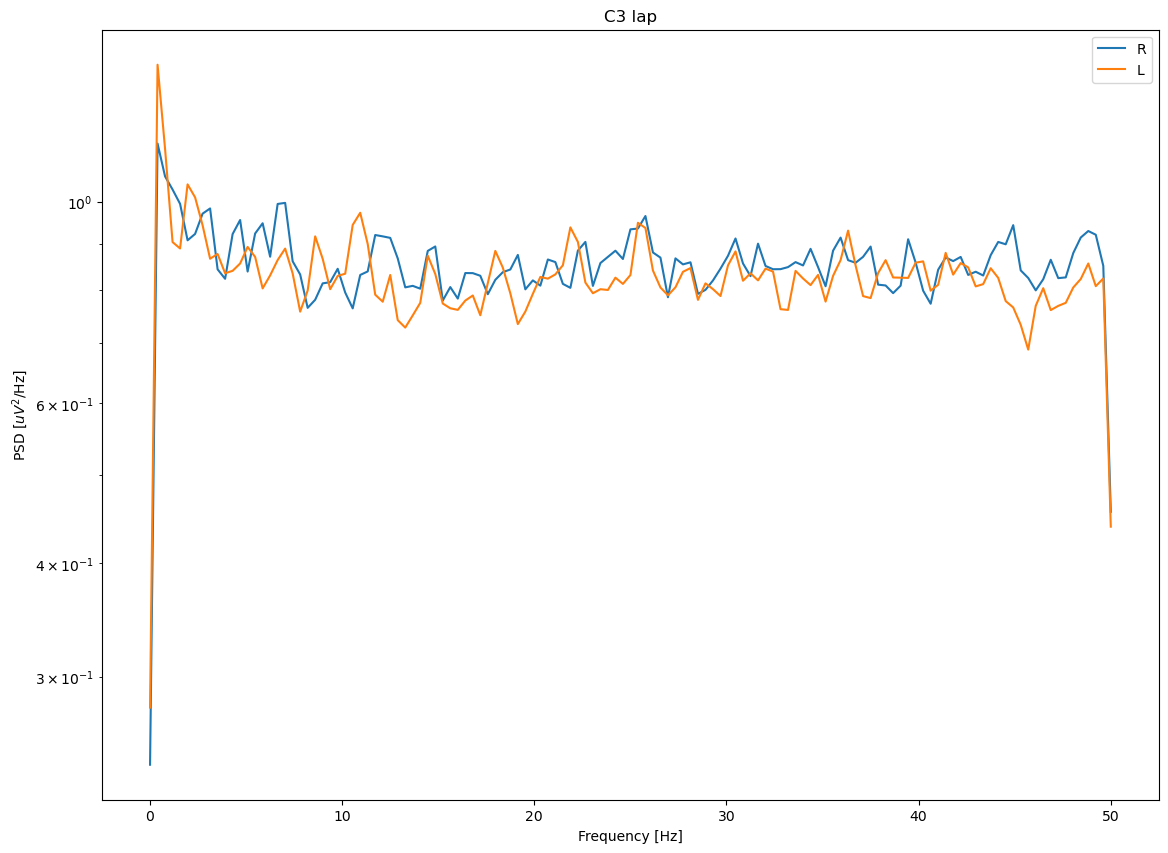

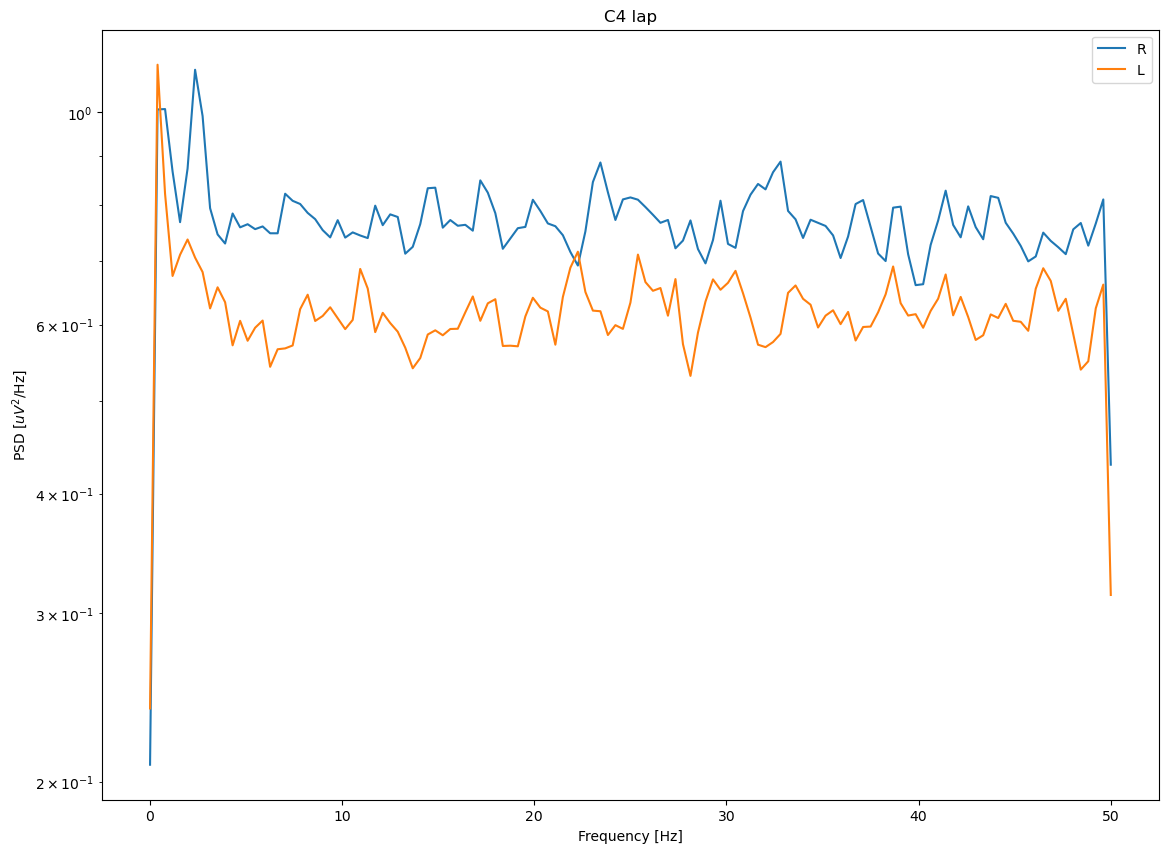

In [31]:
plt.figure(figsize=[30, 10])
plt.subplot(121)
plot_PSD(epo_sf[:,C3,:], fs, epo_sf.y)
plt.title(clab_flt[0])
plt.legend(epo_sf.className)

plt.figure(figsize=[30, 10])
plt.subplot(122)
plot_PSD(epo_sf[:,C4,:], fs,epo_sf.y)
plt.title(clab_flt[1])
plt.legend(epo_sf.className)

## Visualizing ERD/ERS curves

## according to the Technical Validationin the paper 

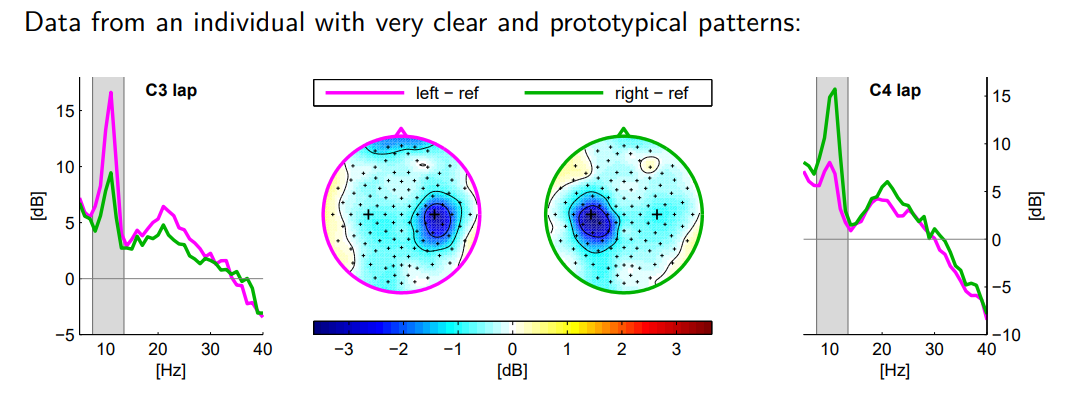

In [36]:
band = np.array([8., 14.])

In [37]:
c3 = epo_sf[:,C3,:]
c4 = epo_sf[:,C4,:]
clab_flt = ['C3 lap', 'C4 lap']

In [38]:
Wn = band / fs * 2
b, a = scipy.signal.butter(5, Wn, btype='bandpass')
cnt_flt = np.concatenate((c3, c4), axis=1)

cnt_flt = sp.signal.lfilter(b, a, cnt_flt)
cnt_hull = np.abs(sp.signal.hilbert(cnt_flt, axis=1))

In [39]:
erd0 = np.mean(cnt_hull.T[:,:,c3.y==0], axis=2)
erd1 = np.mean(cnt_hull.T[:,:,c3.y==1], axis=2)

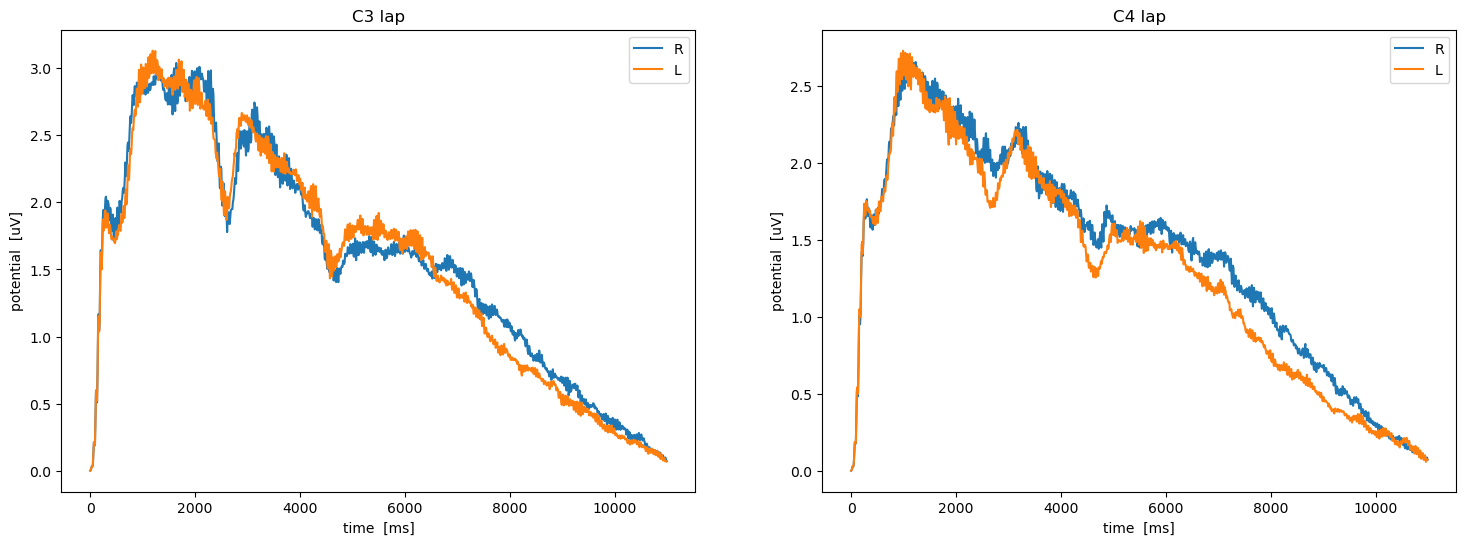

In [40]:
plt.figure(figsize=[18, 6])
nChans= 2
for i in range(nChans):
    plt.subplot(1, nChans, i+1)
    plt.plot(c3.t, erd0[:, i], label=c3.className[0])
    plt.plot(c3.t, erd1[:, i], label=c3.className[1])
    plt.title(clab_flt[i])
    plt.xlabel('time  [ms]')
    plt.ylabel('potential  [uV]')
    plt.legend()

## CSP

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV
from sklearn.model_selection import cross_val_score

from bbcpy.pipeline import make_pipeline
import bbcpy.functions.helpers as helpers
from bbcpy.functions.base import ImportFunc
from bbcpy.functions.spatial import CSP, MBCSP
from bbcpy.functions.artireject import AverageVariance

In [ ]:
cv = KFold()
var = ImportFunc(np.var, axis=2)

In [ ]:
ival = '0s:10s:10ms'
bands = [10.5, 40.]
# select a subject number and its sessions to load, you can find the data in this link :
# https://figshare.com/articles/dataset/Human_EEG_Dataset_for_Brain-Computer_Interface_and_Meditation/13123148

srm_subject_1 = SRM_Data_Subject(subject_id=1, srm_data_path=srm_data_root_path, sessions_ids=[1, 2, 3])
epo_data_s1 = srm_subject_1.create_subject_object(bands=bands,
                                                  sessions_ids=[1, 2, 3],
                                                  classes=["R", "L"],
                                                  select_chans=['C*', 'FC*'],
                                                  select_timepoints=ival)

In [ ]:
csp_pipeline = make_pipeline(CSP(scoring=helpers.evscoring_medvar,select=helpers.evselect_directorscut), var, np.log, LDA())
print(cross_val_score(csp_pipeline, epo_data_s1, epo_data_s1.y, cv=cv))

In [ ]:
csp_pipeline = make_pipeline(CSP(excllev=1.2, estimator='lwf', scoring=helpers.evscoring_medvar,
                                select=helpers.evselect_directorscut), var, np.log, LDA())
print(cross_val_score(csp_pipeline, epo_data_s1, epo_data_s1.y, cv=cv))

In [ ]:
winlen= 200
winlen_sa= (winlen/1000.*fs).astype(int)
cnt_flt = sp.signal.lfilter(b, a, cnt)
erd, erd_t = bci.makeepochs(cnt_flt, fs, mrk_pos, [1000, 5000])
erd = np.abs(erd)
T = np.floor(erd.shape[0]/winlen_sa).astype(int)
tmp = np.reshape(erd[0:winlen_sa*T,:,:], [winlen_sa, T, erd.shape[1], erd.shape[2]],'F');
erd_sub = np.mean(tmp, axis=0)

nChans = erd_sub.shape[1]
loss = np.zeros([nChans, 1])
for ci in range(nChans):
    fv = erd_sub[:, ci, :]
    loss[ci], _ = cfy.crossvalidation(cfy.train_LDA, fv, mrk_class)

bci.scalpmap(mnt, loss, clim=(25, 50), cb_label='x-validation loss  [%]')

In [ ]:
def baseline(epo, epo_t, ref_ival):
    '''
    Usage:
        epo = baseline(epo, epo_t, ref_ival)
    Parameters:
        epo: a 3D array of segmented signals, see makeepochs
        epo_t: a 1D array of time points of epochs relative to marker (in ms)
        ref_ival: a two element vector specifying the time interval for which the baseline is calculated [ms]
    '''
    idxref = (ref_ival[0] <= epo_t) & (epo_t <= ref_ival[1])
    eporef = np.mean(epo[idxref, :, :], axis=0, keepdims=True)
    epo = epo - eporef
    return epo

## Freq band 

In [ ]:
# ival = '0s:10s:1ms'
ival = 'all'
bands = None
# select a subject number and its sessions to load, you can find the data in this link :
# https://figshare.com/articles/dataset/Human_EEG_Dataset_for_Brain-Computer_Interface_and_Meditation/13123148

srm_subject_1 = SRM_Data_Subject(subject_id=1, srm_data_path=srm_data_root_path, sessions_ids=[1, 2, 3])
epo_data_s1 = srm_subject_1.create_subject_object(bands=bands,
                                                  sessions_ids=[1],
                                                  classes=["R", "L"],
                                                  select_chans=['C*', 'FC*'],
                                                  select_timepoints=ival)

In [ ]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt

In [ ]:
C3, C4 = epo_data_s1.chans.index('C3'), epo_data_s1.chans.index('C4')
# NOTE: Do spatial filtering
epo_sf = epo_data_s1.copy()
epo_sf[C3] = proc_spatialFilter(epo_data_s1, epo_data_s1.chans, 'C3', neighbors='CP3')
epo_sf[C4] = proc_spatialFilter(epo_data_s1, epo_data_s1.chans, 'C4', neighbors=['C2','C6','FC4','CP4'])
clab_flt = ['C3-CP3', 'C4 lap']

In [ ]:
# NOTE: Get trials and do baseline correction
pre_start, post_start, post_end = -2000, 2000, 8000

In [ ]:
# NOTE: Calculate average power spectral densities
epo_ival = epo_sf[:,:,(post_start <= epo_sf.t) & (epo_sf.t <= post_end)]

In [ ]:
right_inds = np.where(epo_data_s1.y == 0)[0]
left_inds = np.where(epo_data_s1.y == 1)[0]
# NOTE: Define class masks
right_epo = epo_data_s1[right_inds]
left_epo  = epo_data_s1[left_inds]

In [ ]:
print(epo_ival[right_inds, C3, :].shape)
print(epo_ival[left_inds, C3, :].shape)
fs = epo_sf.fs
mrk_className = epo_sf.className

In [ ]:
f_c3_left, psd_c3_left = sp.signal.welch(epo_ival[left_inds, C3,:].flatten('F'), fs=fs)
f_c3_right, psd_c3_right = sp.signal.welch(epo_ival[right_inds, C3, :].flatten('F'), fs=fs)
f_c4_left, psd_c4_left = sp.signal.welch(epo_ival[left_inds, C4, :].flatten('F'), fs=fs)
f_c4_right, psd_c4_right = sp.signal.welch(epo_ival[right_inds, C4, :].flatten('F'), fs=fs)

# NOTE: Helper curve
one_over_f = (np.linspace(f_c3_left[0], f_c3_left[-1], num=len(f_c3_left)-1), 1/f_c3_left[1:])

In [ ]:
def r_square(epo, y, mrk_className):
    '''
    Synopsis:
        epo_r = r_square(epo, y)
    Arguments:
        epo:    3D array of segmented signals (time x channels x epochs), 
                see makeepochs
        y:      labels with values 0 and 1 (1 x epochs)
    Output:
        epo_r:  2D array of r^2 values (time x channels)
    '''
    n = [len(y[y == i]) for (i, name) in enumerate(mrk_className)]
    print(n)
    norm_factor = np.prod(n) / np.sum(n) ** 2
    mean = [np.mean(epo[name == i,:, :,], axis=0) for (i, name) in enumerate(mrk_className)]
    print(mean[0].shape)
    print(mean[1].shape)
    
    delta = mean[0] - mean[1]
    return norm_factor * delta ** 2 / np.var(epo, axis=0)


def signed_r_square(epo, y):
    '''
    Synopsis:
        epo_r = signed_r_square(epo, y)
    Arguments:
        epo:    3D array of segmented signals (time x channels x epochs), 
                see makeepochs
        y:      labels with values 0 and 1 (1 x epochs)
    Output:
        epo_r:  2D array of signed r^2 values (time x channels)
    '''
    epo0 = epo[:, :, y==0]
    epo1 = epo[:, :, y==1]
    N1 = epo0.shape[2]
    N2 = epo1.shape[2]
    const = np.float(N1*N2) / ((N1+N2)**2)
    mudiff = epo0.mean(axis=2) - epo1.mean(axis=2)
    var = epo.var(axis=2)
    return np.sign(mudiff) * const * (mudiff)**2 / var

In [ ]:
np.var(psd_all_both, axis=0).shape

In [ ]:
psd_all_both.shape

In [ ]:
epo_ival.shape

In [ ]:
epo_ival.y.shape

In [ ]:
# NOTE: Calculate signed r2 values
f_all_both, psd_all_both = sp.signal.welch(epo_ival, fs=fs)
r2 = r_square(psd_all_both, epo_ival.y, mrk_className)[1:].T

In [ ]:
epo_csp_r2=signed_r_square(psd_all_both.T,epo_ival.y)

In [ ]:
r2.shape

In [ ]:
psd_all_both.shape

In [ ]:
# NOTE: Select frequence band
freq_band = (90.75, 130.25)
# NOTE: Plot averaged power spectral densities
_, ax = plt.subplots(figsize=(16, 4))
ax.set_title(f'Averaged power spectral density for channel C3 from {post_start}ms to {post_end}ms')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Spectral power [dB]')
ax.axvspan(*freq_band, color='gray', alpha=0.5)

instances = ax.plot(f_c3_left, 10 * np.log10(psd_c3_left), label='left', color='orange')
instances += ax.plot(f_c3_right, 10 * np.log10(psd_c3_right), label='right', color='cyan')
instances += ax.plot(*one_over_f, color='red', label='~ 1/f')

In [ ]:
ax2 = ax.twinx()
ax2.set_ylabel('$r^2 values$')
instances += [ax2.bar(one_over_f[0], r2[C3], label='$r^2$ values')]
ax2.set_yticks(np.linspace(0, 1, num=5))

In [ ]:
ax.legend(instances, [i.get_label() for i in instances], loc='upper right')
_, ax = plt.subplots(figsize=(16, 4))
ax.set_title(f'Averaged power spectral density for channel C4 from {post_start}ms to {post_end}ms')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Spectral power [dB]')
ax.axvspan(*freq_band, color='gray', alpha=0.5)

instances = ax.plot(f_c4_left, 10 * np.log10(psd_c4_left), label='left', color='orange')
instances += ax.plot(f_c4_right, 10 * np.log10(psd_c4_right), label='right', color='cyan')
instances += ax.plot(*one_over_f, color='red', label='~ 1/f')

In [ ]:




ax.legend(instances, [i.get_label() for i in instances], loc='upper right')

_, ax = plt.subplots(figsize=(16, 4))
ax.set_title(f'Averaged power spectral density for channel C4 from {post_start}ms to {post_end}ms')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Spectral power [dB]')
ax.axvspan(*freq_band, color='gray', alpha=0.5)

instances = ax.plot(f_c4_left, 10 * np.log10(psd_c4_left), label='left', color='orange')
instances += ax.plot(f_c4_right, 10 * np.log10(psd_c4_right), label='right', color='cyan')
instances += ax.plot(*one_over_f, color='red', label='~ 1/f')

ax2 = ax.twinx()
ax2.set_ylabel('$r^2 values$')
instances += [ax2.bar(one_over_f[0], r2[C4], label='$r^2$ values')]
ax2.set_yticks(np.linspace(0, 1, num=5))

ax.legend(instances, [i.get_label() for i in instances], loc='upper right')

# Experiment Design 
During the BCI experiment, the users attempted to steer the a virtual cursor from the center of the screen out to one of the **FOUR** targets. 
The participants recieved the following instructions:  
``Imagine your left (right) hand opening and closing to move the cursor left (right). Imagine both hands opening and closing to move the cursor up. Finally, to move the cursor down, voluntarily rest; in other words, clear your mind.``


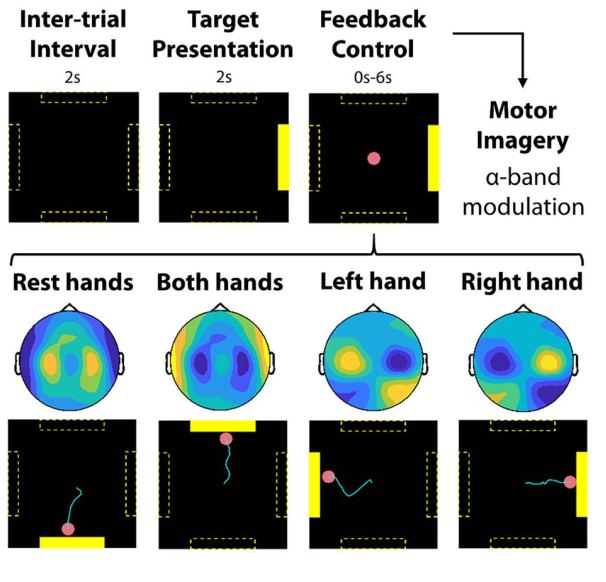

# Observation 

* Plot the trial 3 parts (Each trial is composed of 3 parts: the inter-trial interval, target presentation, and feedback control.)
* Plot along 3 task type (['LR', 'UD', '2D'])
* Calculate the "hits", "misses" and "Timeouts":
    * "hits" : when cursor contacted the correct traget 
    * "misses" : when the cursor contacted one of the 3 edges of the screen
    * "timeouts": occured when 6s elapsed without selecting any target
* Participant proficient metric PVC (was defined as hits/(hits + misses))
    * "PVC was averaged across runs for each BCI session. Participants were considered proficient in a given task if their average block or session PVC crossed a given threshold (70%          for 1D tasks [LR,UD] and 40% for the 2D task) 49"

In [ ]:
hilbilly = bbcpy.functions.base.ImportFunc(signal.hilbert, outClass='same', axis=-1)
ERD1 = np.abs(hilbilly(cnt_bp)).epochs(ival)
plt.figure()
plt.subplot(131)
bbcpy.visual.scalp.map(imagVPaw, ERD1.classmean(0)[0, :, '3s'])
plt.subplot(132)
bbcpy.visual.scalp.map(imagVPaw, ERD1.classmean(1)[0, :, '3s'])
plt.subplot(133)
bbcpy.visual.scalp.map(imagVPaw, ERD1.classmean(1)[0, :, '3s'] - ERD1.classmean(0)[0, :, '3s'])
plt.figure()
plt.subplot(211)
plt.plot(ERD1.t, np.squeeze(ERD1.classmean()[:, 'C3']).T)
plt.subplot(212)
plt.plot(ERD1.t, np.squeeze(ERD1.classmean()[:, 'C4']).T)
plt.show()

### Plot trial id=0

In [ ]:
trial_1 = data[0]
time = timepoints[0][-1] 

In [ ]:
plt.plot(timepoints[0]

In [ ]:
ival = []
epo, epo_t = makeepochs(X, fs, mrk_pos, ival)